In [43]:
#
# Author: Manny Alvarez
#
# Network and Complexity 
# 
# Downey Chapter 2 Exercises 
# 
#



A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file figs already exists.
Error occurred while processing: figs.


Saving figure to file figs/chap02-1
Saving figure to file figs/chap02-2
Saving figure to file figs/chap02-3
Saving figure to file figs/chap02-4
0.05011872336272722 0.0
0.06760829753919818 0.0
0.09120108393559097 0.004
0.12302687708123815 0.016
0.16595869074375605 0.109
0.22387211385683395 0.346
0.3019951720402016 0.664
0.40738027780411273 0.899
0.5495408738576245 0.989
0.7413102413009173 1.0
1.0 1.0
Saving figure to file figs/chap02-5
300


C:\Users\Manny\utils.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


100
30


C:\Users\Manny\utils.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to file figs/chap02-6


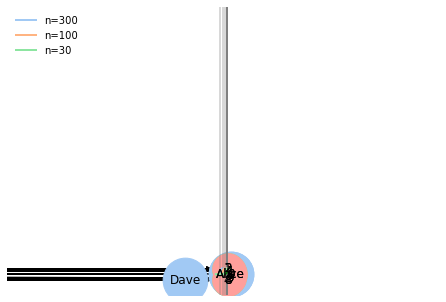

In [59]:
########################### 2.1 ###########################
'''
"Launch chap02.ipynb and run the code. There are a few
short exercises embedded in the notebook that you might want to try."
'''

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# make a directory for figures
!mkdir -p figs

# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Cate')
list(G.nodes())

G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Cate')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Cate')
list(G.edges())

nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
savefig('figs/chap02-1')

G.add_edge('Dave', 'Alice')
G.add_edge('Dave', 'Cate')
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)

positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

G.add_edges_from(drive_times)
G.edges()

nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')
savefig('figs/chap02-2')

positions['Scranton'] = (-76, 42)
G.add_node('Scranton')

drive_times.update({('Scranton', 'Albany'): 3,
                    ('Scranton', 'NYC'): 2,
                    ('Scranton', 'Philly'): 2})

G.add_edges_from(drive_times)

nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

complete = make_complete_graph(10)
complete.number_of_nodes()

nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-3')

list(complete.neighbors(0))

def all_directed_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield u, v
                
def make_complete_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_directed_pairs(nodes))
    return G

complete_digraph = make_complete_digraph(5)

nx.draw_circular(complete_digraph, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

def flip(p):
    return np.random.random() < p

def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-4')

def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

reachable_nodes(complete, 0)

reachable_nodes(random_graph, 0)

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

is_connected(complete)

random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

is_connected(random_graph)

def directed_reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.successors(node))
    return seen

def digraph_is_connected(G):
    for start in G:
        reachable = directed_reachable_nodes(G, start)
        if len(reachable) < len(G):
            return False
    return True
        
complete_digraph = make_complete_digraph(5)
digraph_is_connected(complete_digraph)

# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

pstar = np.log(n) / n
pstar

ps = np.logspace(-1.3, 0, 11)
ps

ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')

savefig('figs/chap02-5')

ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]],
         loc='upper left')

savefig('figs/chap02-6')



In [ ]:
########################### 2.2 ###########################
'''
"In Section 2.8 we analyzed the performance of reachable_nodes
and classified it in O(n + m), where n is the number of nodes and m is the
number of edges. Continuing the analysis, what is the order of growth for
is_connected?"
'''


In [72]:
## From 2.8 

def reachable_nodes(G, start):
    seen = set()
    stack = [start]
while stack:
    node = stack.pop()
    if node not in seen:
        seen.add(node)
        stack.extend(G.neighbors(node))
return seen


## 2.2 continued 

'''
My understanding of O(n+m) is in time complexity where the this is a linear function with two unique variable independently increasing-- that is if we are iterating through these elements. 
From this question, my asumption is that teh reachable nodes are still O(n+m) and that when we use is_connected, it should simplely still be m+n. 
'''



NameError: name 'stack' is not defined

In [60]:
########################### 2.3 ###########################
'''
In my implementation of reachable_nodes, you might be
bothered by the apparent inefficiency of adding all neighbors to the stack
without checking whether they are already in seen. Write a version of this
function that checks the neighbors before adding them to the stack. Does this
“optimization” change the order of growth? Does it make the function faster?
'''

## Referring back to code from 2.8 

def reachable_nodes(G, start):
    seen = set()
    stack = [start]
while stack:
    node = stack.pop()
    if node not in seen:
        sen.add(node)
        stack.extend(G.neighbors(node))
return seen


##### 2.3 continued 


''' 
The order would still be the order of growth, no matter the case we would be cheking these nodes. 
In terms of speed, if we were to check the neighbor first, this might be more intensive as your checking the neighbor as you going to see whether it has been seen"

'''

########################### 2.4 ###########################

'''
There are actually two kinds of ER graphs. The one we generated in this chapter, G(n, p), is characterized by two parameters, the number
of nodes and the probability of an edge between nodes.
An alternative definition, denoted G(n, m), is also characterized by two parameters: the number of nodes, n, and the number of edges, m. Under this
definition, the number of edges is fixed, but their location is random.
Repeat the experiments we did in this chapter using this alternative definition.
Here are a few suggestions for how to proceed:
1. Write a function called m_pairs that takes a list of nodes and the number
of edges, m, and returns a random selection of m edges. A simple way to do
that is to generate a list of all possible edges and use random.sample.
2. Write a function called make_m_graph that takes n and m and returns a
random graph with n nodes and m edges.
3. Make a version of prob_connected that uses make_m_graph instead of
make_random_graph.
4. Compute the probability of connectivity for a range of values of m.
How do the results of this experiment compare to the results using the first
type of ER graph?
'''

## Function where we check the neighbors if already seen 

def checknodes(G,start) 
    seen =set()
    stack =[start]
    while stack: 
    if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen # new addition by removing those that are seen 
            stack.extend(neighbors)
    return seen

### 2.4

'''
1. Write a function called m_pairs that takes a list of nodes and the number
of edges, m, and returns a random selection of m edges. A simple way to do
that is to generate a list of all possible edges and use random.sample.
'''
import random

def m_pairs (nodes, m):
    pairs = list(all_pairs(nodes))
    return random.sample(pairs, m)

'''
2. Write a function called make_m_graph that takes n and m and returns a
random graph with n nodes and m edges.
'''

def make_m_graph(n, m):
    G = nx.Graph() # use graph function 
    nodes = range(n) 
    G.add_nodes_from(nodes) 
    G.add_edges_from(m_pairs(nodes, m))
    return G 

'''
3. Write a function called make_m_graph that takes n and m and returns a
random graph with n nodes and m edges.
'''
 
def make_m_graph(n, m, j=100): 
    counter = 0
    for i in range(j):
        m_graph = make_m_graph(n, m)
        if is_connected(m_graph):
            counter += 1
    return counter/j



NameError: name 'stack' is not defined